# **Q2**

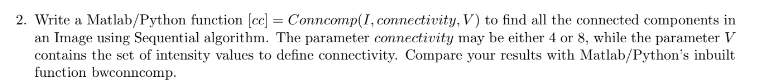

In [27]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage 
from skimage import measure
import cv2

**For image I took 2 pictures given in the assignment namely of Q3 and Q4.**

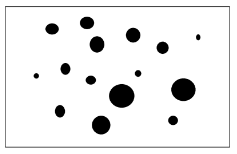

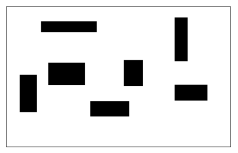

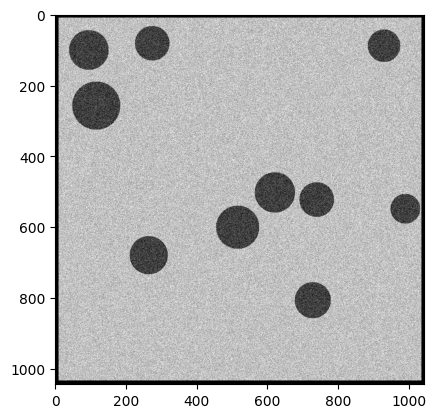

In [40]:
# Read the image in grayscale format
img1 = cv2.imread('Q3.png')
img2 = cv2.imread('Q4.png')

# Convert the image to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Print the gray scale image
plt.imshow(gray1, cmap='gray')

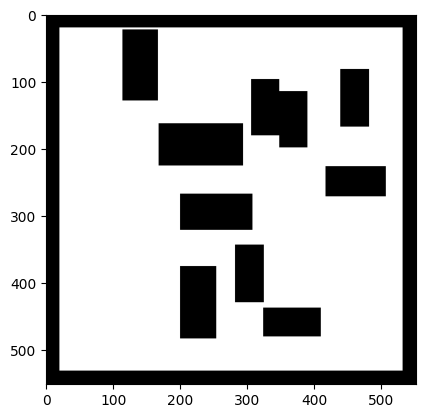

In [38]:
# Print the gray scale image
plt.imshow(gray2, cmap='gray')

In [ ]:
def concomp(I, connectivity, V):

    # Create a matrix of zeroes with the same dimensions as the input image
    label = np.zeros((I.shape[0], I.shape[1]), dtype=np.int32)

    k = 0
    if connectivity == 4:
        for i in range(len(I)):
            for j in range(len(I[0])):
                if I[i][j] in V:
                    if i == 0 and j == 0:
                        k += 1
                        label[i][j] = k
                    elif i == 0 and j > 0:
                        if I[i][j - 1] in V:
                            label[i][j] = label[i][j - 1]
                        else:
                            k += 1
                            label[i][j] = k
                    elif i > 0 and j == 0:
                        if I[i - 1][j] in V:
                            label[i][j] = label[i - 1][j]
                        else:
                            k += 1
                            label[i][j] = k
                    else:
                        if I[i - 1][j] in V and I[i][j - 1] in V:
                            label[i][j] = label[i - 1][j]
                            label[i][j - 1] = label[i][j]
                        elif I[i - 1][j] == V and I[i][j - 1] != V:
                            label[i][j] = label[i - 1][j]
                        elif I[i - 1][j] != V and I[i][j - 1] == V:
                            label[i][j] = label[i][j - 1]
                        else:
                            k += 1
                            label[i][j] = k
        
    

    if connnectivity == 8:

In [25]:
#using matplotlib to read and convert images to desirable form
img1=mpimage.imread('Q3.png')
img2=mpimage.imread('Q4.png')

test1 = open('test1.txt', mode='w')

#converting rgb image to gray image and the gray to binary
size1=img1.shape
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

if len(img1.shape)==3:
  gray1=rgb2gray(img1)
else:
  gray1=np.reshape(img1,(size1[0],size1[1],1))
gray1.flags.writeable=True

#gray to binary conversion
for i in range(size1[0]):
  for j in range(size1[1]):
    if gray1[i,j]>0.5: #chose a definite threshold value of 0.5
      gray1[i,j]=0
      test1.write(str(int(gray1[i,j])))
    else:
      gray1[i,j]=1
      test1.write(str(int(gray1[i,j])))
  test1.write('\n')
#storing it as an image
image_1=gray1
print(image_1)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [3]:
#defining neighbor relation
def neighbor(i,j,label,rel):
  #for 4-connectivity
  if rel==4:
    left=label[i,j-1]
    above=label[i-1,j]
    neighbors=[left,above]
  #for 8-connectivity, we know that above 3 cells and left cell should be taken for the current pixel
  elif rel==8:
    left=label[i,j-1]
    above=label[i-1,j]
    above_left=label[i-1,j-1]
    above_right=label[i-1,j+1]
    neighbors=[above_left,above,above_right,left]
  return neighbors

**Function for sequential component algorithm**

In [2]:
#sequential labeling algorithm for scanning image from left to right and top to bottom for a particular given connectivity i.e. 4 or 8
def seq(image,rel):
  #opening label and new_label files for first pass and second pass respectively
  label1 = open('label1.txt',mode='w')
  new_label1 = open('new_label1.txt',mode='w')
  #initiating a label files containing all ones
  label=np.ones([size1[0],size1[1]])
  tmp=0
  l=[]
  index=0
  #first pass of the image
  for i in range(size1[0]):
    for j in range(size1[1]):
      #if current pixel value is zero, we leave it as it is
      if image[i,j]==[0]:
        label[i,j]=0
        label1.write(str(int(label[i,j])))
      #if current pixel value is 1
      else:
        #extracting the neighbors
        neigh=neighbor(i,j,label,rel)
        #for neighbor labels equal to zero, create a new label here stored as tmp 
        #and assign it to the current pixel and write it in the label file
        if neigh.count(0)==len(neigh):
          tmp+=1
          label[i,j]=tmp
          label1.write(str(int(label[i,j])))
        #if neighbor labels are non-zero
        else:
          #if all the neighbors have same label or if only one neighbor is non zero, we assign that label to the current pixel
          if len(set(neigh))==1 or neigh.count(0)==len(neigh)-1:
            label[i,j]=np.max(neigh)
            label1.write(str(int(label[i,j])))
          #if all are different labels, we first assign minimum label to the current pixel and then record equivalence classes 
          #it will be needing in the second pass
          else:
            label[i,j]=np.min(neigh)
            label1.write(str(int(label[i,j])))
            if index==0:
              l.append(neigh)
              index+=1
            #storing equivalence classes
            else:
              flag=0
              #looping over all the non-zero neighbors
              for k in range(index):
                x=set(l[k]).intersection(set(neigh))
                if len(x)!=0:
                  l[k]=set(l[k]).union(neigh)
                  np.array(l)
                  flag+=1
              if flag==0:
                index+=1
                np.array(l)
                l.append(set(neigh))
    label1.write('\n')
  
  #second pass for relabeling whole image and updating the labels by checking the equivalence lists and updating if necessary
  for i in range(size1[0]):
    for j in range(size1[1]):
      for k in range(index):
        if label[i,j] in l[k] and label[i,j]!=0:
          label[i,j]=min(l[k])
  #writing the new labels in the new_label file
  for i in range(size1[0]):
    for j in range(size1[1]):
      for k in range(index):
        if label[i,j]==min(l[k]):
          label[i,j]=k+1
      new_label1.write(str(int(label[i,j])))
    new_label1.write('\n')
  return label,image,index

In [60]:
#testing of sequential labeling algorithm
# label,image,index=seq(image_1,8)
label,image,index=seq(image_1,4)

All the output files of the input image for 2 connectivities 4 and 8 i.e. text files containing each input image, label and new_label files containing the first pass and second pass labels for each final output image are attached with the ipynb file.

**Comparing the new_label output file with the python's function skimage.measure.label equivalent to bwconncomp function from matlab.**

**The compare file of img1 is attached with the ipynb file.**

In [61]:
#code for skimage.measure.label for sequential connected algorithm
from skimage import measure
all_labels = measure.label(image_1)
compare=open('compare.txt',mode='w')
for i in range(len(all_labels)):
  for j in range(len(all_labels[0])):
    compare.write(str(int(all_labels[i,j])))
  compare.write('\n')
compare.close()

# **Example for testing**

**Comparison of the skimage.measure.label function with built from scratch seq function for the given input 10*10 matrix**



In [21]:
#testing the sequential component labeling algorithm on an example
image_2=np.array([[0,0,0,0,0,0,0,0,0,0],[0,1,1,1,0,0,1,1,1,0],[0,0,1,1,0,0,1,1,0,0],[0,0,1,1,0,0,1,1,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,1,0,0,0,0,0,0,1,0],[0,0,1,0,0,0,0,1,0,0],[0,0,0,1,1,1,1,0,0,0],[0,0,0,0,0,0,0,0,0,0]])
size1=image_2.shape
print(image_2)
label,image,index=seq(image_2,8)
all_labels = measure.label(image_2)
compare=open('compare.txt',mode='w')
for i in range(len(all_labels)):
  for j in range(len(all_labels[0])):
    compare.write(str(int(all_labels[i,j])))
  compare.write('\n')

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 1 1 1 0]
 [0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [22]:
label

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 3., 1., 1., 4., 4., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 5., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
all_labels

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 2, 2, 2, 0],
       [0, 0, 1, 1, 0, 0, 2, 2, 0, 0],
       [0, 0, 1, 1, 0, 0, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 4, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 4, 4, 4, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Input image

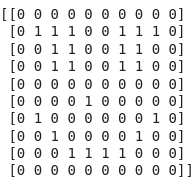

Output from the seq function

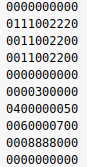

Skimage output(inbuilt function)

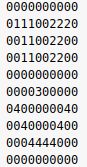